<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 1</h4>
<h4 align="center">feel free to ask your questions via telegram,

questions 1,4 : @BeNameBalasari and questions 2,3,5 : @maahmoradi

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the output of your code.<br>
<font color='red'>**Please do not edit the existing codes.**</font>

#### Pantea Amoie 
#### Student Number : 400101656

## 1. Introduction to matrices
In this question, we want to get familiar with performing simple matrix operations and obtaining special features of matrices in Python <br>
#### 1-1-  Vector P-Norm
 Let $p\geq 1$  be  a real   number . The  p-norm ( also called 
$\ell ^{p}$-norm) of  vector 
${\displaystyle \mathbf {x} =(x_{1},\ldots ,x_{n})}$  is : 
${\displaystyle \|\mathbf {x} \|_{p}:=\left(\sum _{i=1}^{n}\left|x_{i}\right|^{p}\right)^{1/p}}$ and
${\displaystyle \|\mathbf {x} \|_{\infty}:=max(|x_1| , |x_2| , \cdots ,|x_n|)}$ 
> Write a function that takes a vector and p as input and gives p-norm as output then use it to calculate the norm-3 of the  following vector ( if the p is np.inf the function should give the infinity norm of the matrix ) :
$$
x = \left(\begin{array}{cc} 
-3.0\\ 1.0 \\2.0
\end{array}\right)
$$
> then use np.linalg.norm to check your answer 

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def pnorm(x, p):
    if p==np.inf:
        norm = max(np.absolute(x))
    else:
        sigma = 0
        for i in range(len(x)):
            sigma = sigma + (np.absolute(x[i]))**p
        norm = (sigma)**(1/p)
    return norm

In [3]:
x=[-3, 1, 2]
vec = np.array(x)
p=3
print(pnorm(x, 3), ":using pnorm function")
print(np.linalg.norm(x, 3), ":using np.linalg.norm")

3.3019272488946263 :using pnorm function
3.3019272488946263 :using np.linalg.norm


#### 1-2- Matrix Norm
 The 
 operator  norm of matrix $ \mathbf{A}  $ is : 
${\displaystyle \|\mathbf {A} \|:=\max\limits_{x\neq 0}\left(\frac{||Ax||}{||x||}\right)}$

and  The Frobenius  norm  is defined  so 
that   for  every  square  matrix $ \mathbf{A} $ : ${\displaystyle \|\mathbf {A} \|_F:=\left(\sum_{i,j=1}^{n}(|a_{ij}|^2)\right)^\frac{1}{2}}$

> Write a function that takes a Matrix  as input and gives frobenius norm as output then use it to calculate the norm of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.norm to check your answer and use it to calculate the operator norm of A 

In [4]:
# Code cell
def fnorm(A):
    sigma = 0
    for i in range(np.size(A, 0)):
        for j in range(np.size(A, 1)):
            sigma = sigma + (np.absolute(A[i, j]))**2
    norm = (sigma)**(1/2)  
    return norm

In [5]:
A = np.matrix('7 5 1; 1 7 1; 5 5 7')
print(fnorm(A), ":using fnorm function")
print(np.linalg.norm(A), ":using np.linalg.norm")

15.0 :using fnorm function
15.0 :using np.linalg.norm


#### 1-3- Matrix Determinant And Matrix inverse 
Laplace expansion expresses the determinant of a matrix 
A recursively in terms of determinants of smaller matrices, known as its minors. The minor 
, $M_{i,j}$ is defined to be the determinant of the 
${\displaystyle (n-1)\times (n-1)}$ matrix that results from 
A by removing the 
i-th row and the 
j-th column. The expression 
${\displaystyle (-1)^{i+j}M_{i,j}}$  is known as a cofactor. For every 
i, one has the equality :
$$
det(\mathbf{A})=\sum_{j=1}^n\left((-1)^{i+j}a_{ij}M_{ij}\right)
$$
> Write a function that takes a Matrix  as input and gives Determinant as output then use it to calculate the Determinant of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.det to check your answer 

In [6]:
def deter(A):
    # base case for n=1
    if A.shape[0]==1:
        det = A[0, 0]
    # base case for n=2
    elif A.shape[0]==2:
        det = A[0, 0]*A[1, 1] - A[0, 1]*A[1, 0]
    # if n>2
    else:
        det=0
        # calculating the det by looping on the columns
        for i in range(A.shape[1]): 
            # create the new matrix by deleting the specific row & column
            new_A = np.delete(A, 0, 0)
            new_A = np.delete(new_A, i, 1)
            det += ((-1)**i)*A[0, i]*deter(new_A)
    return det

In [7]:
A = np.matrix('7 5 1; 1 7 1; 5 5 7')
print(deter(A), ":using our function")
print(round(np.linalg.det(A), 5), ":using np.linalg.det")

268 :using our function
268.0 :using np.linalg.det


The inverse of a Matrix is defined as : 
$$
\mathbf{A}^{-1}=\frac{adj(A)}{det(A)}
$$
The adjugate of $\mathbf{A} \ adj(\mathbf{A})$ is the transpose of $\mathbf{C}$, that is, the n × n matrix whose (i, j) entry is the (j, i) cofactor of A,
$$
adj(\mathbf{A})=\mathbf{C}^T=\left((-1)^{i+j}M_{ji}\right)_{1 \leq i,j \leq n}
$$
> Write a function that takes a Matrix  as input and gives inverse of Matrix as output then use it to calculate the inverse of the  following Matrix :
$$
A = \begin{bmatrix}
    7 & 5 & 1\\
    1 & 7 & 1\\
    5 & 5 & 7
\end{bmatrix}
$$
> then use np.linalg.inv to check your answer 

In [8]:
def inv(A):
    adj_A = np.zeros((A.shape[0], A.shape[1]))
    for i in range(A.shape[0]): 
        for j in range(A.shape[1]):
            new_A = np.delete(np.delete(A, i, 0), j, 1)
            adj_A[j, i] = ((-1)**(i+j))*deter(new_A)
        A_inv = adj_A / deter(A)
    return A_inv

In [9]:
A = np.matrix('7 5 1; 1 7 1; 5 5 7')
print(inv(A), ":using our function \n")
print(np.linalg.inv(A), ":using np.linalg.inv")

[[ 0.1641791  -0.1119403  -0.00746269]
 [-0.00746269  0.1641791  -0.02238806]
 [-0.1119403  -0.03731343  0.1641791 ]] :using our function 

[[ 0.1641791  -0.1119403  -0.00746269]
 [-0.00746269  0.1641791  -0.02238806]
 [-0.1119403  -0.03731343  0.1641791 ]] :using np.linalg.inv


## 2. Gauss-Jordan elimination
#### 2-1-  Implementation
The Gauss-Jordan Elimination method is an algorithm to solve a linear system of equations. This method solves the system by representing it as an augmented matrix, reducing it using row operations, and expressing the system in reduced row-echelon form to find the values of the variables. \
The function gauss_jordan_elimination takes two arguments: the matrix A representing the coefficients of the equations, and the vector b representing the constants on the right-hand side of the equations. It sets flag to 1 and returns the solution vector x if exists, else sets flag to 0 in case of 'No Solution' or 'Infinite Solutions' and prints the corresponding case.

Here's an example of a system of equations $\textbf{Ax = b}$

the inputs of the function :

$$
A = \begin{bmatrix}
    2  & 1  & 5 \\
    4  & 4  & -4 \\
    1 & 3 & 1 
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
    8  \\
    4  \\
    5 
\end{bmatrix}
$$

the corresponding output :

$$
x = \begin{bmatrix}
    1  \\
    1  \\
    1 
\end{bmatrix}
$$

In [10]:
# import required packages
import numpy as np
import time

In [11]:
def gauss_jordan_elimination(A, b):
    
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    
    # turning the matrix to an upper triangular matrix 
    # looping on the rows
    for p_row in range(0, A.shape[0]):
        # finding each row's pivot
        p_col = p_row
        if A[p_row][p_col] != 0:
            pivot = A[p_row][p_col]
        # if the coefficient of pivot is zero, this row has to be swapped with the next row(P matrix)
        else:
            A[[p_row, p_row+1]] = A[[p_row+1, p_row]]
            b[[p_row, p_row+1]] = b[[p_row+1, p_row]]
            pivot = A[p_row][p_col]
        # for each pivot row, calculate the multiplier of the next rows
        for m_row in range(p_row+1, A.shape[0]):
            m_col = p_row
            # (E matrix)
            multi = A[m_row][m_col] / pivot
            A[m_row][:] = A[m_row][:] - A[p_row][:]*multi
            b[m_row] = b[m_row] - b[p_row]*multi
            
    # turning the upper triangular matrix to a diagonal matrix
    # looping on the rows but from the bottom row to the top
    for p_row in range(A.shape[0]-1, -1, -1):
        # finding each row's pivot
        p_col = p_row
        pivot = A[p_row][p_col]

        # at this point if the pivot is zero it means the matrix 
        # has a full zero row ,so flag = 0
        if (abs(pivot) < 0.00001):
            flag = 0
            break
        else:
            # for each pivot row, calculate the multiplier of the 
            # non zero elements that are above the pivots
            flag = 1
            for m_row in range(p_row-1, -1, -1):
                while A[m_row][p_col] == 0 and m_row > -1:
                    m_row -= 1
                # turning that element to zero
                multi = A[m_row][p_col] / pivot
                A[m_row][:] = A[m_row][:] - A[p_row][:]*multi
                b[m_row] = b[m_row] - b[p_row]*multi

            
    for p_row in range(0, A.shape[0]):
        # finding each row's pivot
        pivot = A[p_row][p_row] 
        b[p_row] = b[p_row] / pivot
    
    x = np.copy(b)
    return x, flag

In [12]:
# Evaluation Cell
n = 10
A = np.zeros((10,10))
b = np.random.randint(100, size=(10))
while np.linalg.matrix_rank(A) != n: 
    A = np.random.randint(0,100,(n, n))
s = time.time()
elapsed = time.time() - s
x, flag = gauss_jordan_elimination(A,b)
assert flag == 1, "flag's not set correctly"
assert np.linalg.norm(A @ x - b) < 1e-7, "Ax = b is not satisfied"
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')
b = np.random.randint(100, size=(10))
A = np.random.randint(0, 100, (n, n))
U, S, V = np.linalg.svd(A)
r = 9  
S[r:] = 0 
A = U.dot(np.diag(S)).dot(V)
b = np.random.randint(100, size=(10))
s = time.time()
elapsed = time.time() - s
x, flag = gauss_jordan_elimination(A,b)
assert flag == 0, "flag's not set correctly"
print(f'status: successful, time elapsed: {np.round(elapsed, 5)} seconds')

status: successful, time elapsed: 0.0 seconds
status: successful, time elapsed: 0.0 seconds


## 3. Statistics on random matrices

On average, a random matrix is invertible. But what if the random matrix has entries that are either 0 or 1 with equal probability? What is the probability that a 5 by 5 matrix whose entries are all zeros or ones is singular? And what is the average number of pivot columns? That is what you will find out in this exercise.

Create random integer matrices whose entries are either 0 or 1. To find the number of pivot columns of a matrix A, complete the function getrank below.


In [13]:
def getrank(A):
    
    # first convert the matrix to its row echelon form
    for p_row in range(A.shape[0]):
        # find the pivot of this row
        pivot = A[p_row][p_row]
        p_col = p_row
        # if this is not the pivot (it's zero):
        if pivot == 0:
            for i in range(p_row + 1, A.shape[0]):
                if A[i][p_row] != 0:
                    # swap the rows
                    A[[p_row, i]] = A[[i, p_row]]
                    pivot = A[p_row][p_row]
                    break
            
            # if pivot is zero, move to the next column
            if pivot == 0:
                p_col = p_row+1
                while p_col < A.shape[1] and A[p_row][p_col] == 0:
                    p_col += 1
                if p_col >= A.shape[1]: 
                    continue
                pivot = A[p_row][p_col]
                # if pivot is still zero, we have a zero row
                # so continue the algorithm for the next row
                if pivot == 0:
                    continue
           
        for m_row in range(p_row+1, A.shape[0]):
            m_col = p_col
            multi = A[m_row][m_col] / pivot
            A[m_row][:] = A[m_row][:] - A[p_row][:]*multi

    
    rank = A.shape[0]
    for r_i in range(A.shape[0]):
        count = 0
        # if a row is zero, rank will be discremented by 1
        for c_i in range(A.shape[1]):
            if A[r_i][c_i] == 0:
                count += 1
        if count == A.shape[1]:
            rank -= 1
            
    return rank

In [14]:
num = 100000;  # Number of random trials 
n = 5  # Size of matrix


# (avg number of pivots, probability of being singular)
# in the format [a.b,c.d] where you rounded the answer to one decimal place.
pivot_sum = 0.0
singular_n = 0.0
for trial in range(num):
    A = np.random.randint(2, size=(n, n))
    rank = getrank(A)
    pivot_sum += rank
    if rank != n:
        singular_n += 1
    
pivot_avg = round(pivot_sum / num, 1)
singular_prob = round(singular_n / num, 1)

print("[", pivot_avg, "," , singular_prob, "]")

[ 4.3 , 0.6 ]


In [15]:
num = 100000;  # Number of random trials 
n = 10  # Size of matrix


# (avg number of pivots, probability of being singular)
# in the format [a.b,c.d] where you rounded the answer to one decimal place.
pivot_sum = 0.0
singular_n = 0.0
for trial in range(num):
    A = np.random.randint(2, size=(n, n))
    rank = getrank(A)
    pivot_sum += rank
    if rank != n:
        singular_n += 1
    
pivot_avg = round(pivot_sum / num, 1)
singular_prob = round(singular_n / num, 1)

print("[", pivot_avg, "," , singular_prob, "]")

[ 9.4 , 0.5 ]


We've looked at random matrices whose entries are 0 or 1. But how does size effect the rank and the probability of being singular? Repeat the previous exercise for 10 by 10 matrices with entries that are 0 or 1.

Explore and plot the probability of singularity and the average number of pivots for different sizes of random matrices. Can you determine how this probability depends on the size of the matrix? You might try to find the probability of a 10 by 10 random matrix with entries 0 or 1 has rank 10, 9, 8, 7 etc. You can check your probabilities against the expected value to see if your probabilities match your observations. You might try to connect these probabilities with determinant formulas to see if you can predict the numbers from other formulas and prove a relationship. Happy explorations!

 guess what happens as $n \rightarrow \infty $
, but only run up to 80

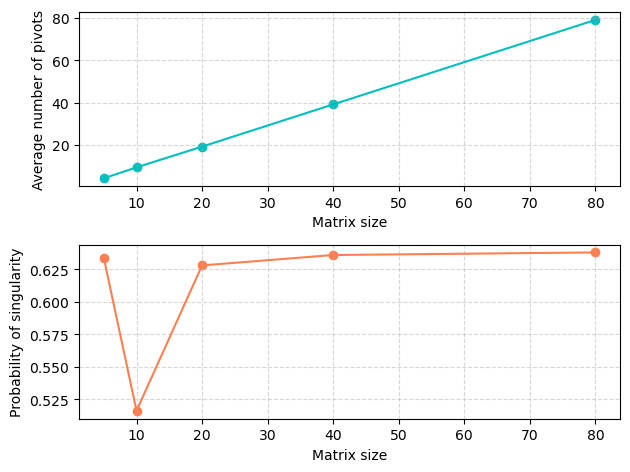

In [16]:
nvalues = [5,10,20,40,80]
nval_num = len(nvalues)
num = 500

pivot_avg = []
singular_prob = []
for n in nvalues :
    pivot_sum = 0.0
    singular_n = 0.0
    for trial in range(num):
        A = np.random.randint(2, size=(n, n))
        rank = getrank(A)
        pivot_sum += rank
        if rank != n:
            singular_n += 1

    pivot_avg.append(round(pivot_sum / num, 3))
    singular_prob.append(round(singular_n / num, 3))
    
fig, axs = plt.subplots(2)

axs[0].scatter(nvalues, pivot_avg, color='c')
axs[0].plot(nvalues, pivot_avg, color='c')
axs[0].set_xlabel("Matrix size")
axs[0].set_ylabel("Average number of pivots")

axs[1].scatter(nvalues, singular_prob, color='coral')
axs[1].plot(nvalues, singular_prob, color='coral')
axs[1].set_xlabel("Matrix size")
axs[1].set_ylabel("Probability of singularity")

# add grid
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[1].grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

For a matrix to be singular, its rows must be linearly dependent(determinant equal to zero). If any row is a linear combination of the other rows, the matrix will be singular.The probability that the ith row is a linear combination of the other rows can be approximated as 1/n,as there are n-1 other rows that the ith row can be a multiple of.
For singularity to occur, any of the n rows can be linearly dependent on the other rows.
Hence, the probability of singularity is $ 1-(1-1/n)^n $.
The limit of this probability as n approaches infinity to obtain a formula that relates the probability of singularity to the matrix size is:
$ \lim_{x\to\infty} 1-(1-1/n)^n = 1-1/e \approx 0.632 \ $
This shows that as the matrix size grows, the probability of a random matrix being singular approaches approximately 0.632, meaning a high likelihood of singularity for larger matrices with random entries from a binary distribution.

The number of pivots in a matrix corresponds to the number of non-zero leading entries obtained during Gaussian elimination or while transforming the matrix to its row echelon form. Larger matrices often involve more operations in Gaussian elimination, leading to more non-zero pivots.

## 4. Application of Cholesky decomposition
#### 4-1-  Cholesky decomposition
In linear algebra, LU decomposition factors a matrix ($\textbf{A} :n \times n$) as the product of a lower triangular matrix ($\textbf{L} :n \times n$) and an upper triangular matrix ($\textbf{U} :n \times n$). The product sometimes includes a permutation matrix ($\textbf{P} :n \times n$) as well.
$$ \textbf{PA} = \textbf{LU} $$
We know that the elements on the main diagonal of the $\textbf{U}$ are the pivots. So $\textbf{U}$ can be decomposed into a diagonal matrix ($\textbf{D} :n \times n$) with elements whose pivots are on the main diagonal and a normalized $\textbf{U}$ matrix.
$$ \textbf{PA} = \textbf{LDU}  $$
if the A is symmetric then we have the Cholesky decomposition :
$$
\mathbf{A}^T=\mathbf{A} \longrightarrow \mathbf{A} =LD^\frac{1}{2}D^\frac{1}{2} L^T= (LD^\frac{1}{2})(LD^\frac{1}{2})^T=L'{L'} ^T
$$
There are various methods for calculating the Cholesky decomposition one of them is $\bold{Cholesky–Banachiewicz}$ algorithm :
$$
A=LL^T=\begin{bmatrix}
    L_{11}& 0 & 0\\
    L_{21} & L_{22} & 0\\
    L_{31}  & L_{32}  & L_{33} 
\end{bmatrix}\begin{bmatrix}
    L_{11}  & L_{21}  & L_{31} \\
    0  & L_{22}  & L_{32} \\
    0 & 0 & L_{33} 
\end{bmatrix}=\begin{bmatrix}
    L_{11}^2  &   & (symmetric) \\
    L_{21}L_{11}  & L_{21}^2+L_{22}^2  &  \\
    L_{31}L_{11}& L_{31}L_{21}+L_{32}L_{22}& L_{33}^2+L_{32}^2+L_{31}^2 
\end{bmatrix}
$$

and therefore the following formulas for the entries of L:

$$
L_{jj}=\sqrt{A_{jj}-\sum_{k=1}^{j-1}L_{jk}^2} \\
\\
L_{i,j}=\frac{\left(A_{ij}-\sum_{k=1}^{j-1}L_{jk}L_{ik}\right)}{L_{jj}} \  \ for \ \ i>j
$$

> Use this algorithm to write a function that takes a matrix and gives its cholesky decomposition. also print the output for the following matrix :
$$
\mathbf{C}=
\begin{bmatrix}
    1 & 0.7 \\
    0.7 & 1
\end{bmatrix}
$$ 


> then use np.linalg.cholesky to check your answer 

In [17]:
def Cholesky(A):
    
    L = np.zeros((A.shape[0], A.shape[1]))
    
    for i in range(A.shape[0]):
        for j in range(i + 1):
            multi_sum = 0
            for k in range(j):
                multi_sum += L[j][k] * L[i][k]
            if i == j:
                L[j][j] = math.sqrt(A[j][j] - multi_sum)
                
            else:
                L[i][j] = (A[i][j] - multi_sum) / L[j][j]
                
    
    return L

In [18]:
A = np.array([[1,0.7],[0.7,1]])
print(np.linalg.cholesky(A))
L = Cholesky(A)
print(L)

[[1.         0.        ]
 [0.7        0.71414284]]
[[1.         0.        ]
 [0.7        0.71414284]]


#### 4-2-  Using Cholesky to generate correlated random numbers

The co-variance Matrix of any random vector Y
 is given as $\mathbf{E}(YY^T)$
, where Y
 is a random column vector of size n×1
. Now take a random vector, X
, consisting of uncorrelated random variables with each random variable, $X_i$
, having zero mean and unit variance 1
. Since $X_i$
's are uncorrelated random variables with zero mean and unit variance, we have $\mathbf{E}(X_i X_j^T)=δ_{ij}$
. Hence,
$$
\mathbf{E}(XX^T)=I
$$
To generate a random vector with a given covariance matrix $\mathbf{C}$
, look at the Cholesky decomposition of $C$
 i.e. $\mathbf{C}=LL^T$
 
Now look at the random vector $Z=LX$ :
$$
\mathbf{E}(ZZ^T)=\mathbf{E}\left((LX)(LX)^T\right)=L\mathbf{E}(XX^T)L^T =LL^T=\mathbf{C}
$$
Hence, the random vector $\mathbf{Z}$
 has the desired co-variance matrix, $\mathbf{C}$

 >Make the covarience matirx of $C$
  $$
\mathbf{C}=
\begin{bmatrix}
    1 & 0.7 \\
    0.7 & 1
\end{bmatrix}
$$ 

 
 >Then we need another matrix with the desired standard deviation in the diagonal  $\Tau$
 $$
\mathbf{\Tau}=
\begin{bmatrix}
    1 & 0 \\
    0 & 2
\end{bmatrix}
$$ 
>Then find the cholesky decomposition of $C$


In [19]:
C = np.array([[1, 0.7], [0.7 ,1]])
L = Cholesky(C)
print(L)

[[1.         0.        ]
 [0.7        0.71414284]]


>Now  generate values for 2 independent random variables and put them in  2*1000 matrix $X$ (1000 samples)

you can use np.random.normal ( generates iid random variables each time )

In [20]:
# generate values for 2 independent random variables(1000 samples)
var1 = np.random.normal(loc=0, scale=1, size=1000)
var2 = np.random.normal(loc=0, scale=1, size=1000)
# put them in 2*1000 matrix X
X = np.vstack((var1, var2))

>then calculate $\mathbf{Z}=\Tau L X$ and then plot Z[1] in base of Z[0] and X[1] in base of X[0] 

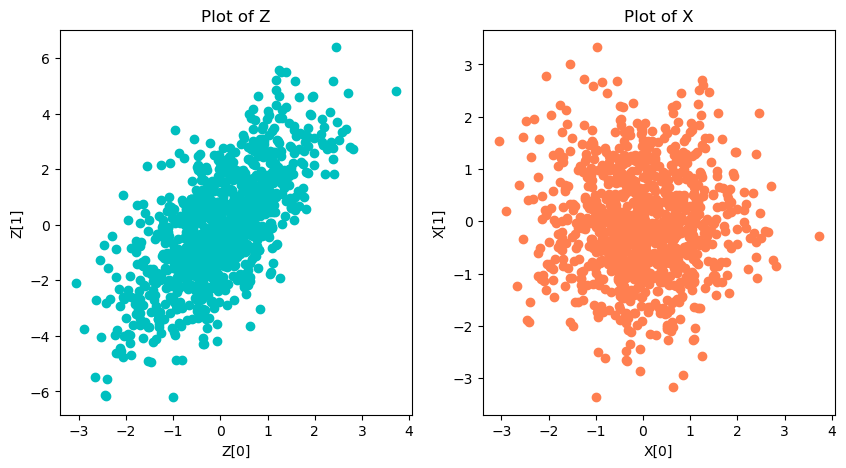

In [21]:
tau = np.array([[1, 0],[0, 2]])
# calculate Z
Z = np.dot(tau, np.dot(L, X))
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(Z[0], Z[1], color='c')
plt.title("Plot of Z")
plt.xlabel("Z[0]")
plt.ylabel("Z[1]")

plt.subplot(1, 2, 2)
plt.scatter(X[0], X[1], color='coral')
plt.title("Plot of X")
plt.xlabel("X[0]")
plt.ylabel("X[1]")

plt.show()

>now  check the correlation in generated samples with using np.correlate

In [22]:
corr_x = np.correlate(X[1], X[0])
corr_z = np.correlate(Z[1], Z[0])
print("correlation Of x[0] and X[1] = ", corr_x)
print("correlation Of Z[0] and Z[1] = ", corr_z)
# X[0] and X[1] have a low correlation with each other, and in comparison with
# Z[0] and Z[1]'s correlation, we can say they(X[0] and X[1]) are not correlated.
# but Z[0] and Z[1] are highly correlated.
# Thus we can say what we did to X(Z=tauLX) has increased correlation.

correlation Of x[0] and X[1] =  [-27.3905562]
correlation Of Z[0] and Z[1] =  [1415.33421334]


## 5. Graphs (bonus)

I suggest running this question's code cells in google colab to install the $\textbf{PyGSP}$ package by  simply running the following code cell

In [1]:
!pip install pygsp


<!-- ![]( graph.png) -->
<div style="text-align:center">
    <img src="graph.png" alt="Image" />
</div> 


For the directed graph above the adjacency matrix is : 
$
A = \begin{bmatrix}
    0  & 1  & 1 & 0\\
    -1  & 0  & 1 & 1 \\
    -1 & -1 & 0 & 1 \\
    0  & -1  & -1 & 0
\end{bmatrix}
$ 

If we change the nodes numbering, the properties of the graph don't change yet the adjacency matrix changes. 


In [23]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
import cv2


#### 5-1-  Introduction to graphs 
>construct the permutation matrix $\textbf{P}$ by modifying the Identity matrix. then use it to number the graph's nodes in reverse order

In [24]:
A = np.array([[0, 1, 1, 0], [-1, 0, 1, 1], [-1, -1, 0, 1], [0, -1, -1, 0]])
I = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
# construct the permutation matrix P by modifying the Identity matrix
P = np.copy(I)
P[:, [2, 1]] = P[:, [1, 2]]
P[:, [3, 0]] = P[:, [0, 3]]
# then use it to number the graph's nodes in reverse order
A_1 = np.dot(P, A)
A_modified = np.dot(A_1, P)

In [25]:
# Evaluation Cell
# I just changed this part of the code *a little bit*, because the default code kept giving me an error.
expected_matrix = np.matrix('0 -1 -1 0; 1 0 -1 -1; 1 1 0 -1; 0 1 1 0')
assert np.array_equal(A_modified, expected_matrix), "wrong!"

#### 5-2-  Graph image processing  

Inpainting is a classical signal processing problem where we wish to fill in the missing values in a
partially observed signal. This is here done in the context of image processing for inferring missing pixel values in
an image. The signal in the image is considered to be the image matrix flattened while the image is modeled as a 2D grid graph.
Inpainting for an image can be formulated as below:

$$(M + \alpha L)x = y$$

where y is a partially observed graph signal (with missing values being 0), and M is a diagonal matrix that satisfies:
 $$ M(i, i)=   \left\{
\begin{array}{ll}
      1, & if & y(i) & is & observed, \\
      0, & if & y(i) & is & not & observed, \\
\end{array} 
\right.  $$

The Equation tries to find an x that nearly matches the observed values in y, and at the same time
being smooth on the graph (the image here). The regularisation parameter α controls the trade-off between the data fidelity term and the
smoothness prior. The solution can therefore be considered as an inpainted version of the partially observed signal.

>Use the cv2 package to load a grayscale version of the cameraman image with a relatively low resolution, 64 by 64, then display the image using matplotlib.pyplot

- do not forget to convert RGB to gray to reduce the 3 color channels to one

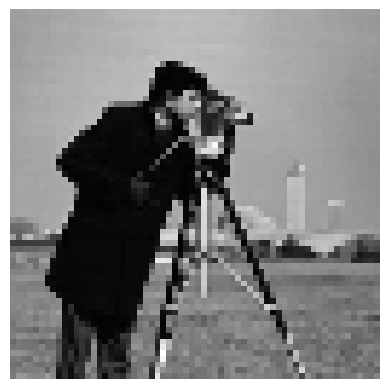

In [26]:
# load a grayscale version of the cameraman image with a relatively low resolution, 64 by 64
img = cv2.imread("cameraman.jpg", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64))
# display the image using matplotlib.pyplot
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

>Now flatten the image matrix to get the signal\
>Then, construct the diagonal matrix M which has its diagonal 0 except for $p = 50%$ of its elements that are randomly set to 1\
>At last, apply the observasion matrix M to the signal and construct y 

(-0.5, 63.5, 63.5, -0.5)

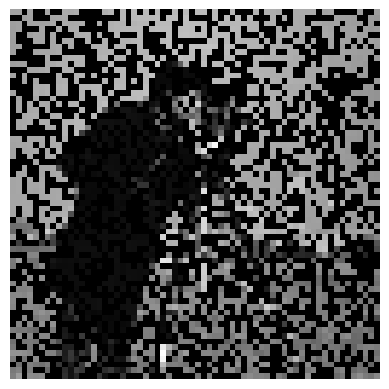

In [27]:
#  flatten the image matrix to get the signal
sig = img.flatten()
p = 50
prob = 0.5
# construct the diagonal matrix M which has its diagonal 0 except for  𝑝=50
# of its elements that are randomly set to 1
diag_array = np.zeros(sig.shape[0])
M = np.zeros((sig.shape[0], sig.shape[0]))
indices = np.random.choice(sig.shape[0], int(prob*sig.shape[0]), replace=False)
diag_array[indices] = 1
np.fill_diagonal(M, diag_array)

# apply the observasion matrix M to the signal and construct y
y = np.dot(M, sig)

damaged_image = np.reshape(y, (64, 64))
plt.imshow(damaged_image, cmap='gray')
plt.axis('off')

In [28]:
# do not edit this cell 
G = graphs.Grid2d(64,64)
L = G.L

>To get x, apply the $\textbf{Cholesky decomposition}$ to ( $M+\alpha L$ ) and then solve the stated equation applying np.linalg.inv() to the two terms multiplied by x ( note that L is given by the code cell above )
- check the soloution with "np.linalg.solve()"

(-0.5, 63.5, 63.5, -0.5)

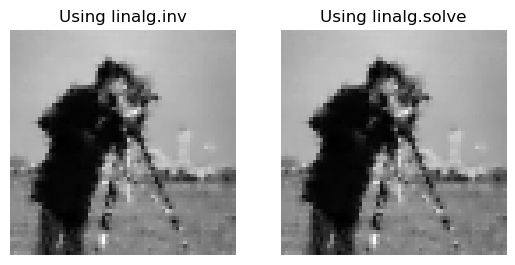

In [29]:
alpha = 0.1  
# create the matrix (M + αL)
M_alpha_L = M + alpha * L
# apply the cholesky decomposition to (M + αL)
cholesky_L = np.linalg.cholesky(M_alpha_L)
# now we have L*L^T*x = y (L = cholesky_L)
x = np.dot(np.linalg.inv(np.dot(cholesky_L, np.transpose(cholesky_L))), y)
# to check the solution, first assume L^(T)*x = z and solve L*z = y, then solve L^(T)*x = z
x_prime = np.linalg.solve(np.transpose(cholesky_L), np.linalg.solve(cholesky_L, y))
# or we can check it using the eq:(M_alpha_L*x=y)
x_double_prime = np.linalg.solve(M_alpha_L, y)
# display the result and check
im_x = np.reshape(x, (64, 64))
im_x_prime = np.reshape(x_double_prime, (64, 64))
plt.subplot(121)
plt.imshow(im_x, cmap='gray')
plt.title('Using linalg.inv')
plt.axis('off')
plt.subplot(122)

plt.imshow(im_x_prime, cmap='gray')
plt.title('Using linalg.solve')
plt.axis('off')

>For values of alpha 0.001 , 0.1 , 10 and p values 50 , 75 display the original, the damaged and the Inpainted image in subplots

In [30]:
# we write a function to use it for different alpha and p values
def image_plot(img, alpha, p, i): 
    prob = 0.5
    # construct the diagonal matrix M which has its diagonal 0 except for  𝑝=50
    # of its elements that are randomly set to 1
    diag_array = np.zeros(sig.shape[0])
    M = np.zeros((sig.shape[0], sig.shape[0]))
    indices = np.random.choice(sig.shape[0], int(prob*sig.shape[0]), replace=False)
    diag_array[indices] = 1
    np.fill_diagonal(M, diag_array)

    y = np.dot(M, sig)
    damaged_image = np.reshape(y, (64, 64))
    
    G = graphs.Grid2d(64,64)
    L = G.L
    M_alpha_L = M + alpha * L
    cholesky_L = np.linalg.cholesky(M_alpha_L)
    x = np.dot(np.linalg.inv(np.dot(cholesky_L, np.transpose(cholesky_L))), y)
    
    im_x = np.reshape(x, (64, 64))
    
    plt.figure(i)
    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title("Original image",)
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(damaged_image, cmap='gray')
    plt.title("Damaged image")
    plt.axis('off')
    plt.subplot(133)
    plt.imshow(im_x, cmap='gray')
    plt.title("Inpainted image  "+ "alpha="+ str(alpha)+ ", p="+ str(p), loc="left")
    plt.axis('off')

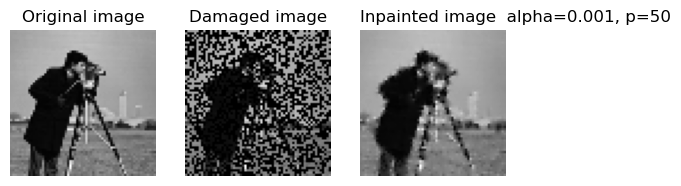

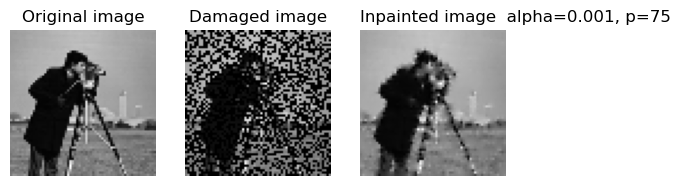

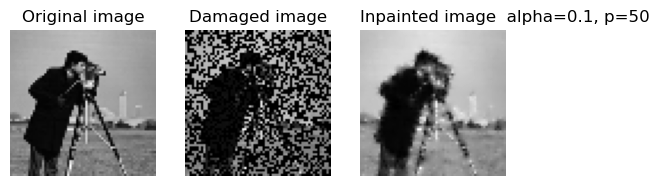

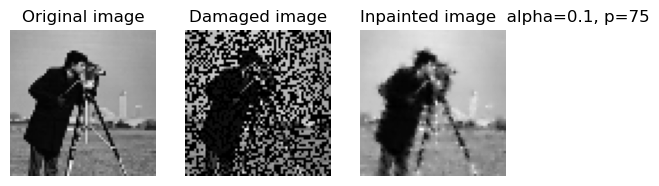

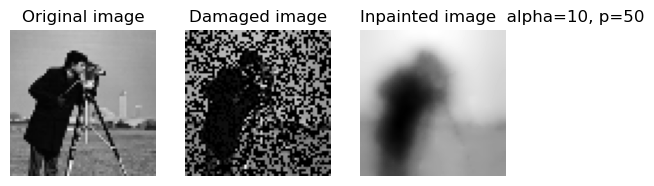

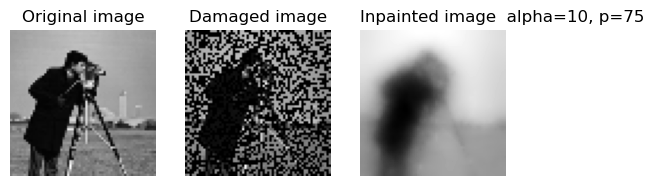

In [31]:
i = 0
for alpha in [0.001, 0.1, 10]:
    for p in [50, 75]:
        i += 1
        image_plot(img, alpha, p, i)